In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

data_folder = '../Data/Crop_field'

In [55]:
def find_line(path2image: str, RGB: bool = True):
    image = cv2.imread(path2image, cv2.IMREAD_GRAYSCALE)
    imageP = image.copy()
    
    median_intens = np.median(image)
    
    lower_thresh = int(max(0, 1 - 0.33) * median_intens)
    upper_thresh = int(max(255, 1 + 0.33) * median_intens)
    
    img_canny = cv2.Canny(image, 50, 100)
    linesP = cv2.HoughLinesP(img_canny, 1, np.pi / 180, 50, None, 50, 10)

    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(imageP, (l[0], l[1]), (l[2], l[3]), (0,255,0), 1, cv2.LINE_AA)
    
    plt.imshow(imageP);

In [68]:
import cv2 as cv
import numpy as np

 # Стандартное преобразование линии Хафа
def line_detection(image):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    edges = cv.Canny(gray, 50, 150, apertureSize = 3) #apertureSize по умолчанию равен 3
    plt.imshow(edges)
    lines = cv.HoughLines(edges, 1, np.pi/180, 80)
    for line in lines:
        rho, theta = line[0] #line [0] хранит полярный диаметр и полярный угол от точки до прямой, где полярный угол выражается в радианах.
        a = np.cos(theta) #theta - это радианы
        b = np.sin(theta)
        x0 = a * rho # представляет x = r * cos (theta)
        y0 = b * rho # представляет y = r * sin (theta)
        x1 = int (x0 + 1000 * (-b)) # Вычислить абсциссу начальной точки прямой
        y1 = int (y0 + 1000 * a) # Вычислить ординату начальной точки
        x2 = int (x0 - 1000 * (-b)) # Вычислить абсциссу конечной точки прямой
        y2 = int (y0 - 1000 * a) # Вычислить ординату конечной точки прямой линии. Примечание. Значение 1000 здесь дает диапазон длины нарисованного сегмента линии. Чем меньше значение, тем короче нарисованный сегмент и тем больше значение. Чем длиннее отрезок линии
        cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2) # Координаты точки должны быть кортежем, а не списком.
    plt.imshow(image)

# Статистическая вероятность Преобразование линии Хафа
def line_detect_possible_demo(image):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    edges = cv.Canny(gray, 50, 150, apertureSize = 3) # Параметр apertureSize по умолчанию равен 3
    lines = cv.HoughLinesP(edges, 1, np.pi / 180, 60, minLineLength=60, maxLineGap=5)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    plt.imshow(image)

In [69]:
src = cv.imread(os.path.join(data_folder, '001_AB_fake_C.png'))
print(src.shape)
plt.imshow(src)

(256, 256, 3)


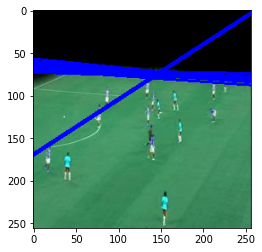

In [70]:
line_detection(src)

In [74]:
src = cv.imread(os.path.join(data_folder, '015_AB_fake_C.png')) # После вызова предыдущей функции входящий массив src будет изменен, поэтому при вызове следующей функции картинку нужно будет прочитать заново
line_detect_possible_demo(src)

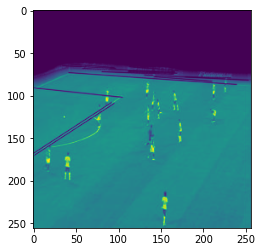

In [56]:
find_line(os.path.join(data_folder, '015_AB_fake_C.png'))

In [73]:
src = cv.imread('../Data/Test_AlHafa/amkar2.jpg') # После вызова предыдущей функции входящий массив src будет изменен, поэтому при вызове следующей функции картинку нужно будет прочитать заново
line_detect_possible_demo(src)

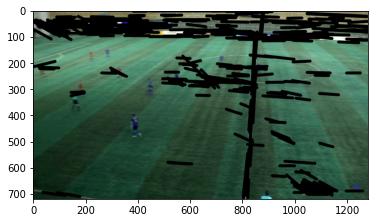

In [21]:
find_line(os.path.join(data_folder, 'amkar3.jpg'))

In [22]:
find_line(os.path.join(data_folder, 'bars_real.jpg'))

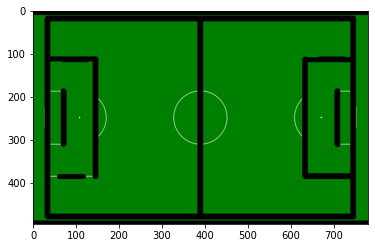

In [23]:
find_line(os.path.join(data_folder, 'field.png'))

In [17]:
# параметры цветового фильтра
hsv_min = np.array((2, 28, 65), np.uint8)
hsv_max = np.array((26, 238, 255), np.uint8)

if __name__ == '__main__':

    fn = '../Data/amkar2.jpg' # путь к файлу с картинкой
    img = cv2.imread(fn)

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV 
    thresh = cv2.inRange(hsv, hsv_min, hsv_max ) # применяем цветовой фильтр
    # ищем контуры и складируем их в переменную contours
    _, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # отображаем контуры поверх изображения
    cv2.drawContours(img, contours, -1, (255,0,0), 3, cv.LINE_AA, hierarchy, 1 )
    plt.imshow(img) # выводим итоговое изображение в окно

ValueError: not enough values to unpack (expected 3, got 2)